In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import collections
import scipy.stats
import numpy as np


# Folder path containing the CSV files
raw_path = "C:\\Users\\raval\\Desktop\\final project\\group project data"

In [27]:
def calculate_entropy(list_values):
    counter_values = collections.Counter(list_values).most_common()
    probabilities = [elem[1]/len(list_values) for elem in counter_values]
    entropy=scipy.stats.entropy(probabilities)
    return entropy

def calculate_statistics(list_values):
    median = np.nanpercentile(list_values,50)
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    return [median,mean,std]

def calculate_crossings(list_values):
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values)>np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return [no_mean_crossings]

def get_features(list_values):
    entropy = calculate_entropy(list_values)
    crossings = calculate_crossings(list_values)
    statistics = calculate_statistics(list_values)
    return [entropy] + crossings + statistics
    
def file_clean(df,filename):
    #rec_start = float(df[3].iloc[9].split(":")[1].strip())
    df = df[df[df[0]=="Row"].index[0]:]
    df = df.reset_index(drop=True)
    df.columns = df.iloc[0].tolist()
    df = df[1:]
    df["SlideEvent"] = df["SlideEvent"].ffill()
    df = df.loc[df.SlideEvent=="StartMedia"]
    df = df.drop(["EventSource","StimType","Duration","SourceStimuliName","CollectionPhase",
                  "SlideEvent", "GSR Resistance CAL","GSR Conductance CAL", "Heart Rate PPG ALG"],axis=1)
    df = df.reset_index(drop=True)
    df["Participant"] = filename
    return df

In [2]:
import pandas as pd
import os

# Folder path containing the CSV files
raw_path = "C:\\Users\\raval\\Desktop\\final project\\group project data"
output_path = "C:\\Users\\raval\\Desktop\\final project\\cleaned_data"

def file_clean(df, filename):
    #rec_start = float(df[3].iloc[9].split(":")[1].strip())
    df = df[df[df[0] == "Row"].index[0]:]
    df = df.reset_index(drop=True)
    df.columns = df.iloc[0].tolist()
    df = df[1:]
    df["SlideEvent"] = df["SlideEvent"].ffill()
    df = df.loc[df.SlideEvent == "StartMedia"]
    df = df.drop(["EventSource", "StimType", "Duration", "SourceStimuliName", "CollectionPhase",
                  "SlideEvent", "GSR Resistance CAL", "GSR Conductance CAL", "Heart Rate PPG ALG"], axis=1)
    df = df.reset_index(drop=True)
    df["Participant"] = filename
    
    return df

columns_to_keep = ['Timestamp', 'Row', 'ET_GazeLeftx', 'ET_GazeLefty', 'ET_GazeRightx',
                   'ET_GazeRighty', 'ET_PupilLeft', 'ET_PupilRight', 'Participant']

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

for file in os.listdir(raw_path):
    # Read the CSV file
    file_path = os.path.join(raw_path, file)
    try:
        df = pd.read_csv(file_path, header=None, low_memory=False)
    except pd.errors.ParserError as e:
        print(f"Error reading CSV file: {file_path}")
        print(e)
        continue
    
    # Clean the DataFrame
    filename = file.split(".")[0].split("_")[1]
    cleaned_df = file_clean(df, filename)
    
    if cleaned_df is not None:
        # Filter and keep desired columns
        cleaned_df = cleaned_df[columns_to_keep]
        
        # Save the cleaned DataFrame as a new CSV file in the output folder
        cleaned_csv_filename = f"{filename}_cleaned.csv"
        cleaned_csv_path = os.path.join(output_path, cleaned_csv_filename)
        cleaned_df.to_csv(cleaned_csv_path, index=False)
        print(f"Saved cleaned CSV file: {cleaned_csv_path}")
    else:
        print(f"Failed to clean CSV file: {file}")


Saved cleaned CSV file: C:\Users\raval\Desktop\final project\cleaned_data\Riffat Siddiqui_cleaned.csv
Saved cleaned CSV file: C:\Users\raval\Desktop\final project\cleaned_data\Robert Schatten_cleaned.csv
Saved cleaned CSV file: C:\Users\raval\Desktop\final project\cleaned_data\Rodney_cleaned.csv
Saved cleaned CSV file: C:\Users\raval\Desktop\final project\cleaned_data\Tejas Shukla_cleaned.csv
Saved cleaned CSV file: C:\Users\raval\Desktop\final project\cleaned_data\Vinit Chauhan_cleaned.csv
Saved cleaned CSV file: C:\Users\raval\Desktop\final project\cleaned_data\Zayd_cleaned.csv
Saved cleaned CSV file: C:\Users\raval\Desktop\final project\cleaned_data\Zhen De Chen_cleaned.csv
Error reading CSV file: C:\Users\raval\Desktop\final project\group project data\Untitled-1.ipynb
Error tokenizing data. C error: Expected 1 fields in line 4, saw 2



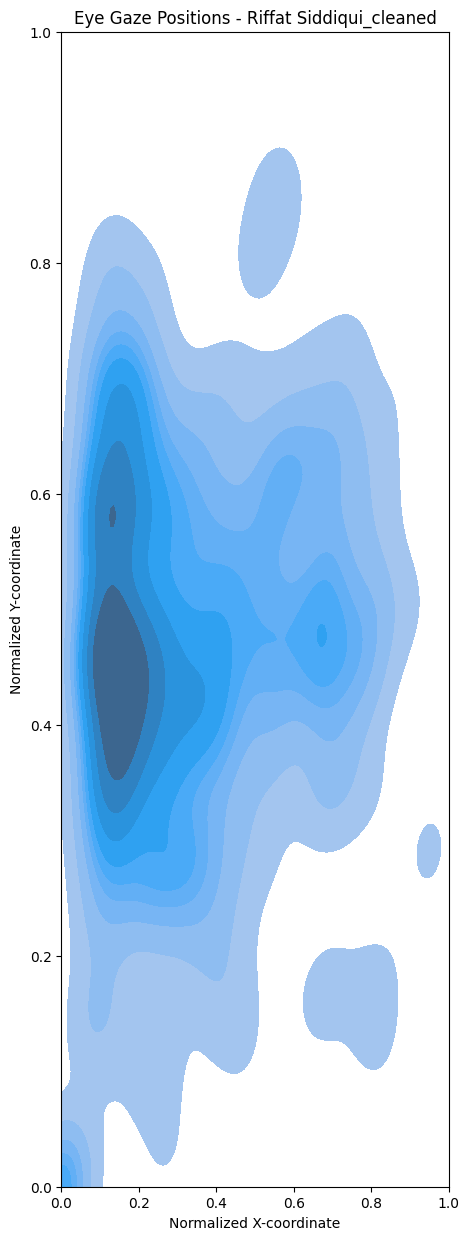

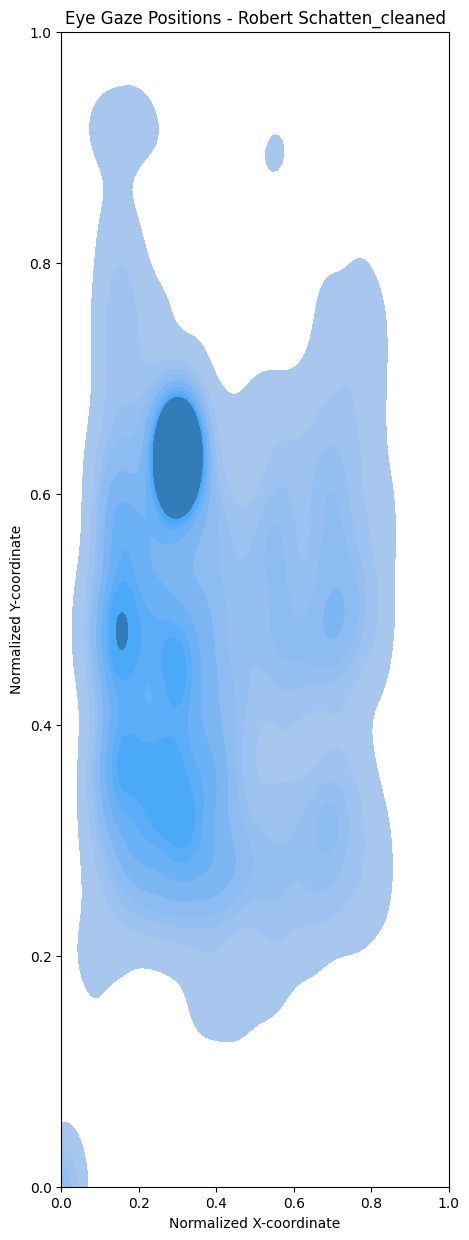

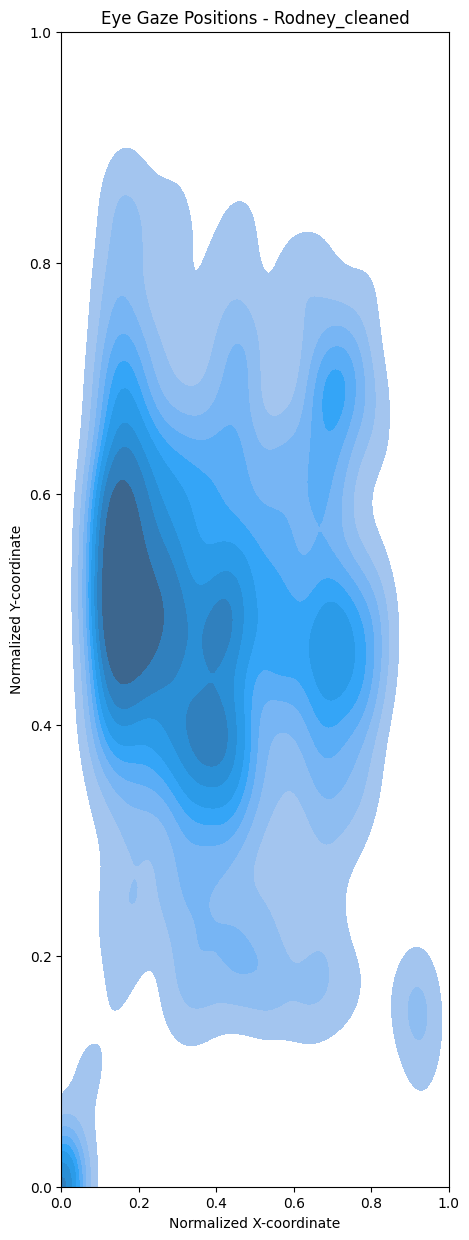

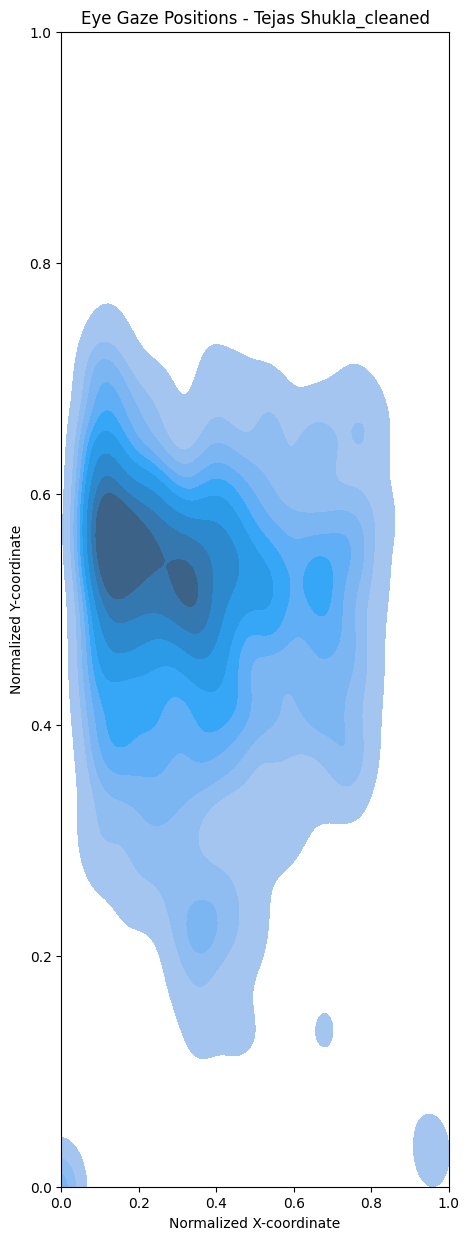

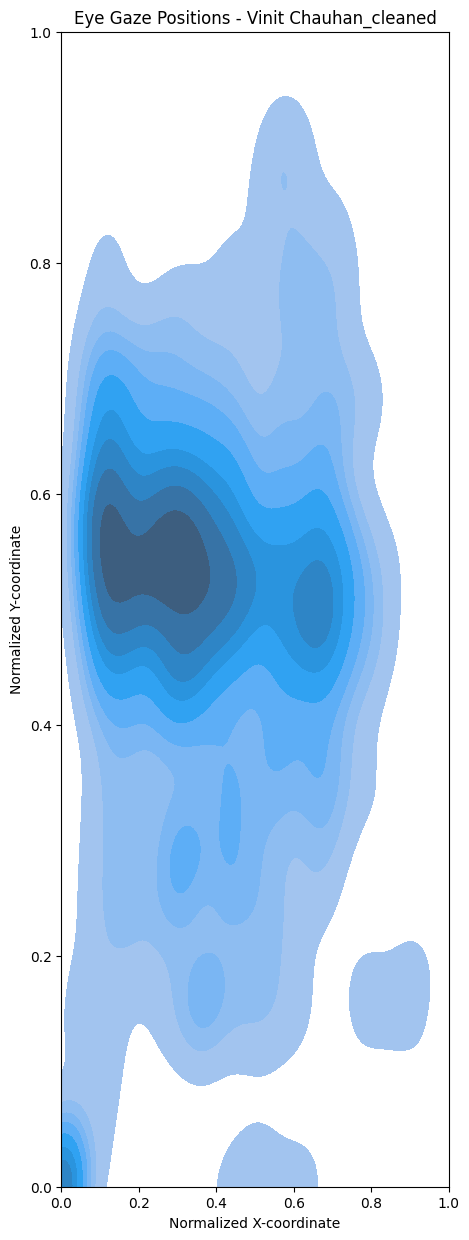

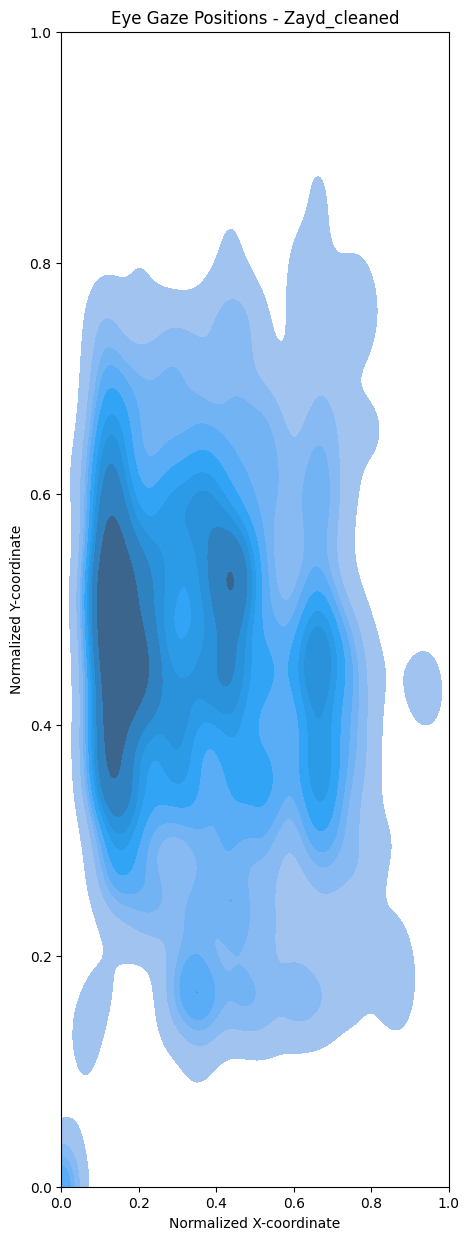

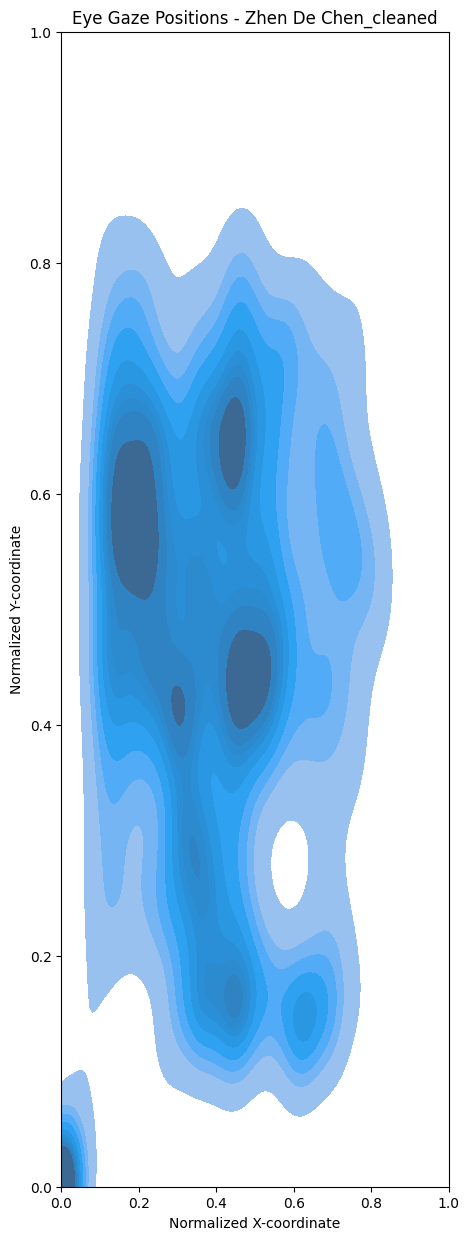

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Folder path containing the cleaned CSV files
cleaned_path = "C:\\Users\\raval\\Desktop\\final project\\cleaned_data"

# Loop through each cleaned CSV file
for file in os.listdir(cleaned_path):
    # Read the cleaned CSV file
    file_path = os.path.join(cleaned_path, file)
    data = pd.read_csv(file_path)

    # Calculate the normalized x and y coordinates
    data['norm_x'] = ((data['ET_GazeLeftx'] + data['ET_GazeRightx']) / 2) / 1920
    data['norm_y'] = ((data['ET_GazeLefty'] + data['ET_GazeRighty']) / 2) / 1080

    # Sort data by y-coordinate
    data = data.sort_values('norm_y')

    # Extract the file name (without extension) for labeling the plot
    file_name = os.path.splitext(file)[0]

    # Create the long vertical image with heatmap
    fig, ax = plt.subplots(figsize=(5, 15))
    sns.kdeplot(data=data, x='norm_x', y='norm_y', fill=True, thresh=0.05, levels=10)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'Eye Gaze Positions - {file_name}')
    plt.xlabel('Normalized X-coordinate')
    plt.ylabel('Normalized Y-coordinate')
    plt.savefig(f'{file_name}_heatmap.png')  # Save the plot as an image
    plt.show()
